# GRIP@THE SPARK FOUNDATION INTERNSHIP #JAN'2021' TASK#2 PRESENTATION

# Author: ALAEBO CHINONSO GOSPEL


# TOPIC: K- Means Clustering (Prediction using Unsupervised ML)

# **Clustering**
In this notebook, we introduce clustering, a machine learning task where one tries to identify groups or clusters of data. Clustering is generally an unsupervised learning technique, since we are simply using the data features to determine some concept of closeness. One common technique used to quantify clustering is to identify clusters by using a metric, or distance measure


# **K- Means**
Specifically, this notebook focuses on K-means clustering, where we seek to divide  𝑁  data points into  𝑘  clusters. First, the K-means algorithm will be introduced and demonstrated on the Iris data. Next, the elbow method is introduced as a technique for determining the best value for  𝑘 . Finally, we discuss one clustering evaluation metric.

# K-means: Iris Data
To introduce the k-means cluster algorithm, we will start by using the standard Iris data set. The four primary dimensions of the data include Sepal Length, Sepal Width, Petal Length, and Petal Width. The data set consists of 150 total measurements of three different types of Iris flowers, equally divided between three classes: Iris Setosa, Iris Versicolor, and Iris Virginica.

Before proceeding with the k-means algorithm, we first need to load and pre-process these data. The following Code cell loads the Iris data into the notebook and extracts the features and labels. Next, the features are scaled to all have zero mean and unit standard deviation. This ensures each feature is treated uniformly during the cluster finding process.

Clustering doesn't need label. We create label here just for visualization purpose.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the digits data
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
# standardize the features
x = StandardScaler().fit_transform(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
# encode species to get labels, this is for visulizat|ion only
y = LabelEncoder().fit_transform(iris.Species)

# Principal Component Analysis¶
The Iris data set has four features which makes it hard to visualize the clusters. To make visualization easier, we will reduce the data set to two features by using principal component analysis, or PCA.

Principal component analysis(PCA), is a technique to perform dimensional reduction. PCA effectively rotates the data into a new set of reduced dimensions. Thus, by employing PCA, we can often identify a reduced set of features that we can use to perform machine learning, while retaining the majority of the characteristics of original features. This can result in faster computations and reliable models since we have reduced the amount of noise used to train the model. For our clustering analysis, PCA provides a way for us to visualize our data in a two-dimensional space.

**Note:** the reduced dataset is used for visualization only. To train the k-means model, we still use original dataset which has 4 features.


In [3]:
from sklearn.decomposition import PCA

# Principal Component Analysis
pca = PCA(n_components=2, random_state=23)

# Fit model to the data
x_pca = pca.fit_transform(x)

# append label to reduced dataset.
x_pca_label = np.concatenate((x_pca, y.reshape(x.shape[0], 1)), axis=1)
# print sample data in reduced dataset, last column is label
print(x_pca_label[:5,:])

[[-2.26454173  0.5057039   0.        ]
 [-2.0864255  -0.65540473  0.        ]
 [-2.36795045 -0.31847731  0.        ]
 [-2.30419716 -0.57536771  0.        ]
 [-2.38877749  0.6747674   0.        ]]


# K-means: Clustering

We perform k-means clustering by using the [`KMeans`][skkm] estimator within the `cluster` module of the scikit-learn library. This algorithm accepts a number of hyperparameters that control its performance, some of the most commonly changed include:
- `n_clusters`: the number of clusters, $k$, the algorithm will find, the default value is 8.
- `n_init`: the number of times the algorithm is run with different initial cluster centers, the default is 10.
- `max_iter`: maximum number of iterations for the algorithm in any given run, the default is 300.
- `random_state`: random seed used by the random number generator, enables reproducibility.

In the following Code cell, we perform k-means cluster finding on the Iris data. We create the estimator by specifying three clusters (one for each species), by indicating that twenty-five different runs should be performed, and by specifying a random state for reproducibility. 

After the estimator is created, we `fit` the model to the data which identifies the cluster centers. Note, this process is unsupervised in that we do not use the label in this process. We also don't need to split the dataset to training and testing. We train and predict on the same data, which is the standardized four features of the original Iris dataset. 

After we find our cluster centers, we `predict` to which cluster each data point belongs.

In [4]:
# We will use kmeans form scikit-learn
from sklearn.cluster import KMeans

# We build our model assuming three clusters
k_means = KMeans(n_clusters=3, n_init=25, random_state=23)

# We fit our original data
k_means.fit(x)

# Obtain the predictions
y_cluster = k_means.predict(x)

In the next Code cell, we get a count of data points in the 3 clusters created by k-means. Each cluster has about 50 data points. This is in line with the truth since we know that there are 3 iris in the dataset and each species has 50 data points.


In [5]:
# count of each class
from collections import Counter 
cnt = Counter(y_cluster)

# Display some basic results of the clustering
print('Cluster count.')
print(30*'-')
for itm in cnt:
    print(f'Cluster {itm}     : {cnt[itm]:>4d} members')

Cluster count.
------------------------------
Cluster 1     :   50 members
Cluster 2     :   47 members
Cluster 0     :   53 members


We can extract the cluster centers (or _centroids_) by using the cluster_centers_ attribute on the estimator. Since we found the clusters in a four-dimensional space, to visualize the cluster centers we must transform the computed centers to the reduced principal components, which we can do by using our pre-defined PCA transformer. The following Code cell performs this operation and displays the individual cluster centers in the principal components space.

In [6]:
# Compute cluster centers, and transform to principal component space
cluster_centers = k_means.cluster_centers_
cc_pca = pca.transform(cluster_centers)

# Display cluster centers
for idx, xy_c in enumerate(cc_pca):
    print(f'Cluster {idx} center located at ({xy_c[0]:4.2f}, {xy_c[1]:4.2f})')

Cluster 0 center located at (0.57, -0.81)
Cluster 1 center located at (-2.22, 0.29)
Cluster 2 center located at (1.72, 0.60)


We now visualize the original data, the assigned cluster, and the cluster centers in our two-dimensional principal component space. The following Code cell creates this visualization.

First, we create one DataFrame for reduced features and labels(true classes), and one DataFrame for reduced features and clusters(predicted classes). To create the second DataFrame, we concatenate the clusters to reduced features(x_pca).

Next, the colors and labels used for the true classes and the assigned clusters are defined. We use same set of colors but when we plot we set different transparency level(alpha) to differentiate true class and predicted clusters.

Finally, the visualization is created by plotting the cluster centers as large, black Xs, plotting the true classes as semi-transparent, large circles, and plotting the cluster labels as solid, small circles.

The resulting figure indicates that the Setosa data are easily distinguished by a separate cluster. On the other hand, the Versicolor and Virginica data are intermixed. However, recall that this cluster finding technique is unsupervised; the true labels were only applied after the clusters were identified. Given the natural blending of these two species, the algorithm still does remarkably well on Iris dataset.


In [7]:
import seaborn as sns

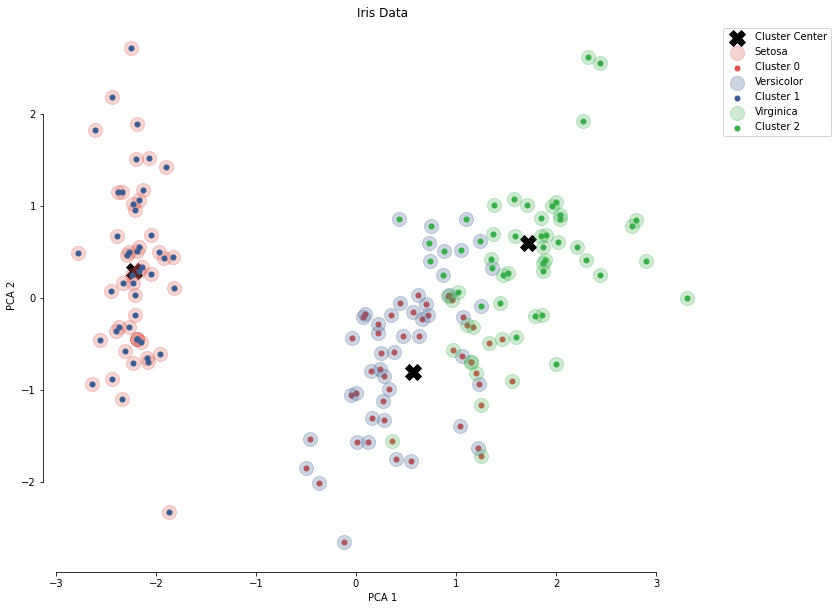

In [8]:
# Now we compare the cluster assignments to the real classes.

# Reduced features with true classes
cols = ['PCA1', 'PCA2', 'Species']
dt = pd.DataFrame(x_pca_label, columns = cols)

# Reduced Features with predicted clusters
pc = pd.DataFrame(np.concatenate((x_pca, y_cluster.reshape(x.shape[0], 1)), axis=1), columns = cols)

# Two sets of colors, can modify these to ensure colors match 
# between known and predicted clusters.
# colors for true classes
clr = [sns.xkcd_rgb['pale red'], 
       sns.xkcd_rgb['denim blue'], 
       sns.xkcd_rgb['medium green']]

# colors for predicted clusters
pclr = [sns.xkcd_rgb['pale red'], 
        sns.xkcd_rgb['denim blue'],
        sns.xkcd_rgb['medium green']]

# Label data
lbls = ['Setosa', 'Versicolor', 'Virginica']
plbls = ['Cluster 0', 'Cluster 1', 'Cluster 2']


# Predicted Clusters

# Now make the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot cluster centers
ax.scatter(cc_pca[:,0], cc_pca[:,1], 
           s=250, c='k', marker='X', 
           label='Cluster Center')

# Plot each species separately
for idx in range(3):
    
    # Plot species(real classes) as large points
    tmp_df = dt[dt['Species'] == idx]
    ax.scatter(tmp_df['PCA1'], tmp_df['PCA2'], 
               color=clr[idx], label=lbls[idx], alpha=0.25, s=200)

    # Plot assignd cluster as small point
    tmp_pdf = pc[pc['Species'] == idx]
    ax.scatter(tmp_pdf['PCA1'], tmp_pdf['PCA2'], 
               color=pclr[idx], label=plbls[idx], alpha=1, s=25)

# Decorate Plot
ax.set(title='Iris Data', xlabel='PCA 1', ylabel='PCA 2')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)
sns.despine(offset=5, trim=True)

### K-means: Elbow Method

Clearly, one of the biggest challenges in using the k-means algorithm to find clusters is in selecting the value of $k$. In some cases, there might be a strong *priori* reason to choose a specific value for $k$, such as with the Iris data and $k=3$. For a general data set, on the other hand, we need a method to identify the best value for $k$. In these cases, the _elbow method_ provides a heuristic estimate that can provide a reasonable value.

The elbow method has several forms, all of which rely on some measure of the quality with which a given number of clusters best fits the data. In this notebook, we will use the **cluster inertia**, which is the sum total distance of every point to its cluster center. When the inertia is plotted against the number of clusters, the value starts high for small numbers of clusters, and as the number of clusters increases, this value will quickly decrease. This decrease arises since more clusters will, on average, reduce the distance between any given point and its cluster center. The extreme scenario is that when k equals to the total number of data points, each data point is its own center, thus the total distance becomes 0. Eventually, however, the inertia levels off as existing clusters are broken into sub-groups. The **best** value for $k$ is selected as the _elbow_ point within this plot. In another word, we will choose a **k** so that increases in k won't reduce total distance significantly.

The following two Code cells demonstrate the _elbow method_. The first Code cell performs k-means clustering for different numbers of clusters(1 to 10). For each set of computed cluster centers, the inertia(total distance) is assigned to the `distances` array. The second Code cell plots the number of clusters versus the corresponding _inertia_. Notice how the _elbow_ is clearly seen at three clusters, where the steep drop changes to a much shallower slope.

-----

In [9]:
# Search for best number of clusters, from one to ten
n_clusters = np.arange(1, 11)
distances = np.zeros(n_clusters.shape[0])

# Perform k-means clustering for different numbers of clusters
# Use the inertia (or sum of total distances between points
# and cluster centers) as the performance metric.
for idx, nc in enumerate(n_clusters):
    # We build our model for nc clusters
    model = KMeans(n_clusters=nc, n_init=10, random_state=23)
    model.fit(x)
    distances[idx] = model.inertia_

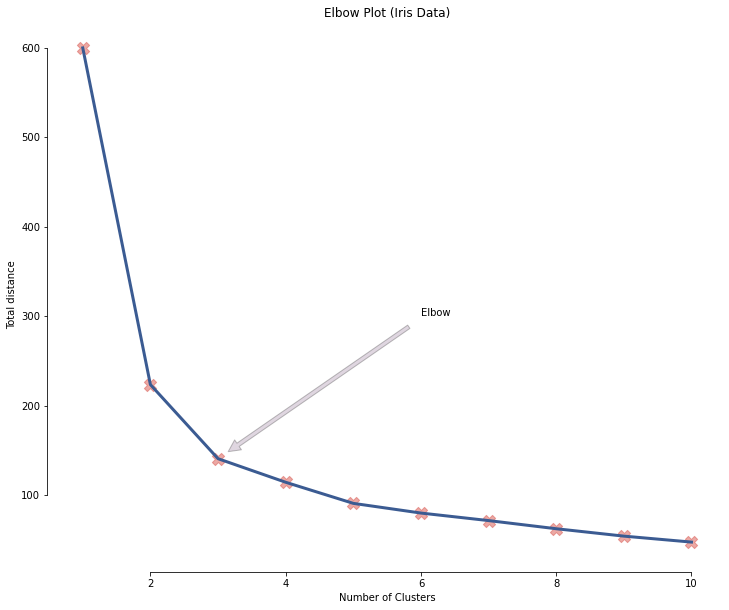

In [10]:
# Plot elbow method
fig, ax = plt.subplots(figsize=(12, 10))

# Draw points and connect them
ax.scatter(n_clusters, distances, s=150, 
           c=sns.xkcd_rgb['pale red'], marker='X', alpha=0.5)
ax.plot(n_clusters, distances, lw=3, linestyle='-', 
        color=sns.xkcd_rgb['denim blue'])

# Define elbow at three clusters
elb = (n_clusters[2], distances[2])

# Draw an arrow showing the elbow
ax.annotate('Elbow', xytext=[6, 300], xy=elb,
                arrowprops=dict(facecolor=sns.xkcd_rgb['dusty purple'], 
                                alpha=0.25, shrink=0.05))

# Decorate Plot
ax.set(title='Elbow Plot (Iris Data)', 
       xlabel='Number of Clusters', 
       ylabel='Total distance')
sns.despine(offset=5, trim=True)